In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Todo

### redo folder structure to write outputs and read inputs like Sam's method
### create a file that does the graphs for the songs

### stats, proportions of distributions, stats per quarter or 10th, words not in original dict


Data structure

mmmm, I think the final DF needs to have artist, song title, split lyrics, and sylables. Split lyrics and syllables will probably be lists.

In [39]:
bi = pd.read_csv("Inputs/BillieEilish.csv")
em = pd.read_csv("Inputs/Eminem.csv")
syl = pd.read_csv("Inputs/phoneticDictionary.csv")

#Configure Syllable Dictionary
syl_cols_to_keep = ["word", "syl"]
syl = syl[syl_cols_to_keep]
syl_dict = {}
for i, row in syl.iterrows():
    syl_dict[row[0]] = row[1]


/var/folders/17/1lp6v8rx7hg46v35nrbf4mk00000gn/T/ipykernel_50882/1809326477.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  syl_dict[row[0]] = row[1]


In [40]:
'''Make Dataframe'''

df = pd.DataFrame(columns=['Artist','Title','Lyrics','Syllables'])

#Limit to single BE album
bi_short = bi.loc[bi['Album'] == 'WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)']


In [41]:
#''' Old Cell
bad_guy_lyrics = bi["Lyric"][2].split()
everything_i_wanted_lyrics = bi["Lyric"][1].split()
rap_god_lyrics = em["Lyric"][0].split()

def lyric_dict_generator(lyrics, dict):
    results = {}
    for item in lyrics:
        val = dict.loc[dict['word'] == item, 'syl']
        results[item] = val.iloc[0] if not val.empty else None
    return results

#test = lyric_dict_generator(rap_god_lyrics,syl)
#'''

In [42]:
def df_row_generator(artist,song,lyrics,dict):
    '''Take Song and Lyric info and add syllable data from dict'''
    lyrics = lyrics.split()
    words = []
    syllables = []
    
    for word in lyrics:
        words.append(word)
        syllables.append(dict.get(word))

    return artist,song,words,syllables

In [43]:
'''Construct DF from lyric df'''
for i, row in bi_short.iterrows():
    df.loc[len(df)] = df_row_generator(row['Artist'],row['Title'],row['Lyric'],syl_dict)

In [44]:
print(df.head())

          Artist                   Title  \
0  Billie Eilish  ​when the party’s over   
1  Billie Eilish                ​bad guy   
2  Billie Eilish          ​bury a friend   
3  Billie Eilish             ​i love you   
4  Billie Eilish      ​wish you were gay   

                                              Lyrics  \
0  [don't, you, know, i'm, no, good, for, you, i'...   
1  [white, shirt, now, red, my, bloody, nose, sle...   
2  [mehki, raine, billie, billie, eilish, what, d...   
3  [it's, not, true, tell, me, ive, been, lied, t...   
4  [baby, i, don't, feel, so, good, six, words, y...   

                                           Syllables  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, ...  
1  [1, 1, 1, 1, 1, 2, 1, None, 1, 1, 1, 2, 1, Non...  
2  [None, 1, 2, 2, None, 1, 1, 1, 1, 1, 1, 1, 1, ...  
3  [1, 1, 1, 1, 1, None, 1, 1, 1, 1, 2, 1, 1, 1, ...  
4  [2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, ...  


In [45]:
df.to_csv("/Users/jacksonlipfert/Desktop/Projects/Lyrics Project/Data_Processing/Outputs/Lyrics_DF")

In [46]:
bad_guy_lyric_syls = lyric_dict_generator(bad_guy_lyrics,syl)
everything_lyric_syls = lyric_dict_generator(everything_i_wanted_lyrics,syl)
rap_god_lyric_syls = lyric_dict_generator(rap_god_lyrics,syl)

bad_guy_lyric_syls_2 = df.iloc[1]['Syllables']
print(bad_guy_lyric_syls_2)


[1, 1, 1, 1, 1, 2, 1, None, 1, 1, 1, 2, 1, None, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


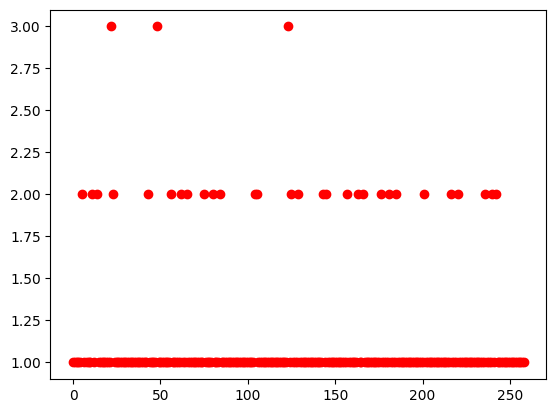

In [47]:
plt.plot(bad_guy_lyric_syls_2,color = 'red', marker = 'o', linestyle = 'none')

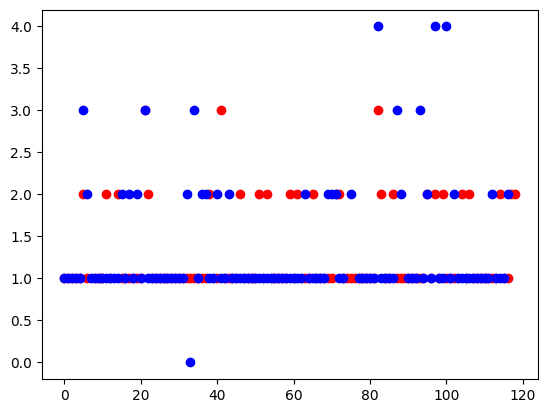

In [48]:
#fig, ax = plt.subplots()
#ax.plot(bad_guy_lyric_syls.values())
plt.plot(bad_guy_lyric_syls.values(),color = 'red', marker = 'o', linestyle = 'none')
plt.plot(everything_lyric_syls.values(),color = 'blue', marker = 'o', linestyle = 'none')


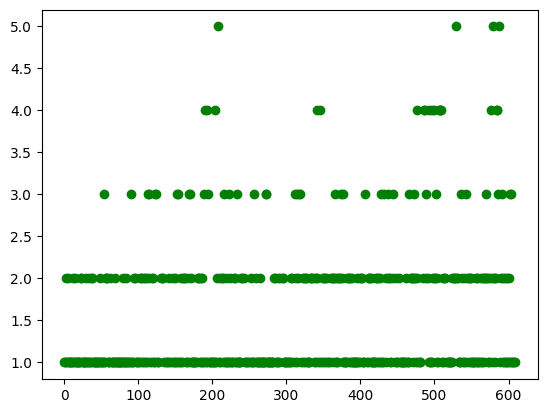

In [49]:
plt.plot(rap_god_lyric_syls.values(),color = 'green', marker = 'o', linestyle = 'none')